In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
x_train = np.array([[10,50], [20,30], [25,30], [20,60], [15, 70], [40,40], [30, 45], [20,45], [40,30], [7,35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

n_train = len(x_train)
w = [0, -1] #initial value
a = lambda x: np.sign(x[0]*w[0] + x[1]*w[1])

In [85]:
help(np.sign)

Help on ufunc:

sign = <ufunc 'sign'>
    sign(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])
    
    Returns an element-wise indication of the sign of a number.
    
    The `sign` function returns ``-1 if x < 0, 0 if x==0, 1 if x > 0``.  nan
    is returned for nan inputs.
    
    For complex inputs, the `sign` function returns
    ``sign(x.real) + 0j if x.real != 0 else sign(x.imag) + 0j``.
    
    complex(nan, 0) is returned for complex nan inputs.
    
    Parameters
    ----------
    x : array_like
        Input values.
    out : ndarray, None, or tuple of ndarray and None, optional
        A location into which the result is stored. If provided, it must have
        a shape that the inputs broadcast to. If not provided or None,
        a freshly-allocated array is returned. A tuple (possible only as a
        keyword argument) must have length equal to the number of outputs.
    where : array_like, optional
       

In [86]:
N = 50 #max number iterations
L= 0.1 #step
e = -0.1

last_error_index = -1

In [87]:
for n in range (N):
    for i in range(n_train):
        if y_train[i]*a(x_train[i]) < 0: # if classification error
            w[0] = w[0] + L + y_train[i] # correct weights
            last_error_index = i

    Q = sum([1 for i in range (n_train) if y_train[i]*a(x_train[i])<0])
    if Q == 0:
        break

if last_error_index > -1:
    print (y_train[last_error_index])
    w[0] = w[0] + e*y_train[last_error_index] # change the line a little bit not to cross the last object

print(w)

1
[2.1, -1]


In [88]:
# classification line
line_x = list(range(max(x_train[:, 0])))
line_y = [w[0]* x for x in line_x]

# training dots
x_o = x_train[y_train == 1]
x_1 = x_train[y_train == -1]

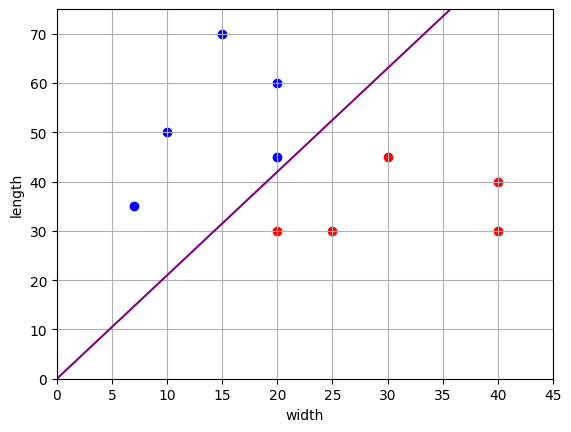

In [89]:
plt.scatter(x_o[:, 0], x_o[:,1], color = 'red')
plt.scatter(x_1[:, 0], x_1[:, 1], color = 'blue')
plt.plot(line_x, line_y, color = 'purple')

plt.xlim ([0, 45])
plt.ylim ([0, 75])
plt.ylabel("length")
plt.xlabel("width")
plt.grid(True)
plt.show()